In [2]:
## Notebook contains:

## customer segmentation based on their spends and purchase transactions using KMeans Clustering (for numerical data)

## Data preprocessing
## Run elbow plot as well as calculate silhouette scores to select optimal 'k'
## Using 'k', run KMeans clustering and obtain the different clusters
## Name these segments and append them to the original df
## Take avg for all df features for each of the cluster segments and interpret them 
## Classification of cluster labels thus created using Logistic Regression

### Importing Libraries

In [3]:
#Importing Data Manipulation libraries
import pandas as pd
import numpy as np
import math
import random

#Importing Data visulaisation Libraries
import seaborn as sns
import matplotlib.pyplot as plt

#Importing machine learning Library.
import sklearn
from sklearn.model_selection import train_test_split
from sklearn.cluster import KMeans
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import silhouette_score, accuracy_score, confusion_matrix, classification_report, roc_auc_score
from sklearn.preprocessing import StandardScaler

import warnings
warnings.filterwarnings("ignore")
import pickle


In [4]:
import os
print(os.getcwd())  # Prints the current working directory

C:\Users\Administrator\Desktop\Course Material - DONO


In [5]:
## To set the working directory
#os.chdir('c:\\Users\\uname\\desktop\\python')  # Provide the new path here

### Loading Data

In [6]:
data = pd.read_csv('CC GENERAL.csv')
data.head()

,CUST_ID,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
0,C10001,40.900749,0.818182,95.40,0.00,95.4,0.000000,0.166667,0.000000,0.083333,0.000000,0,2,1000.0,201.802084,139.509787,0.000000,12
1,C10002,3202.467416,0.909091,0.00,0.00,0.0,6442.945483,0.000000,0.000000,0.000000,0.250000,4,0,7000.0,4103.032597,1072.340217,0.222222,12
2,C10003,2495.148862,1.000000,773.17,773.17,0.0,0.000000,1.000000,1.000000,0.000000,0.000000,0,12,7500.0,622.066742,627.284787,0.000000,12
3,C10004,1666.670542,0.636364,1499.00,1499.00,0.0,205.788017,0.083333,0.083333,0.000000,0.083333,1,1,7500.0,0.000000,NaN,0.000000,12
4,C10005,817.714335,1.000000,16.00,16.00,0.0,0.000000,0.083333,0.083333,0.000000,0.000000,0,1,1200.0,678.334763,244.791237,0.000000,12


In [7]:
#Displaying no. of records and columns
data.shape

(8950, 18)

In [8]:
#Details of dataset
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8950 entries, 0 to 8949
Data columns (total 18 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   CUST_ID                           8950 non-null   object 
 1   BALANCE                           8950 non-null   float64
 2   BALANCE_FREQUENCY                 8950 non-null   float64
 3   PURCHASES                         8950 non-null   float64
 4   ONEOFF_PURCHASES                  8950 non-null   float64
 5   INSTALLMENTS_PURCHASES            8950 non-null   float64
 6   CASH_ADVANCE                      8950 non-null   float64
 7   PURCHASES_FREQUENCY               8950 non-null   float64
 8   ONEOFF_PURCHASES_FREQUENCY        8950 non-null   float64
 9   PURCHASES_INSTALLMENTS_FREQUENCY  8950 non-null   float64
 10  CASH_ADVANCE_FREQUENCY            8950 non-null   float64
 11  CASH_ADVANCE_TRX                  8950 non-null   int64  
 12  PURCHA

- Almost 9000 records with 18 features, interspersed with some missing values
- All of them are numerical features with the exception of ID column

In [9]:
#Descriptive statistics
data.describe()

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
count,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8949.000000,8950.000000,8637.000000,8950.000000,8950.000000
mean,1564.474828,0.877271,1003.204834,592.437371,411.067645,978.871112,0.490351,0.202458,0.364437,0.135144,3.248827,14.709832,4494.449450,1733.143852,864.206542,0.153715,11.517318
std,2081.531879,0.236904,2136.634782,1659.887917,904.338115,2097.163877,0.401371,0.298336,0.397448,0.200121,6.824647,24.857649,3638.815725,2895.063757,2372.446607,0.292499,1.338331
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,50.000000,0.000000,0.019163,0.000000,6.000000
25%,128.281915,0.888889,39.635000,0.000000,0.000000,0.000000,0.083333,0.000000,0.000000,0.000000,0.000000,1.000000,1600.000000,383.276166,169.123707,0.000000,12.000000
50%,873.385231,1.000000,361.280000,38.000000,89.000000,0.000000,0.500000,0.083333,0.166667,0.000000,0.000000,7.000000,3000.000000,856.901546,312.343947,0.000000,12.000000
75%,2054.140036,1.000000,1110.130000,577.405000,468.637500,1113.821139,0.916667,0.300000,0.750000,0.222222,4.000000,17.000000,6500.000000,1901.134317,825.485459,0.142857,12.000000
max,19043.138560,1.000000,49039.570000,40761.250000,22500.000000,47137.211760,1.000000,1.000000,1.000000,1.500000,123.000000,358.000000,30000.000000,50721.483360,76406.207520,1.000000,12.000000


- Most of the features have mean way greater than their median. This is a sign of skewness present in the dataset.

### Data Pre-processing & EDA

In [10]:
#Storing IDs as a separate variable and dropping them from df
cust_id = data['CUST_ID']
data.drop('CUST_ID', axis=1, inplace=True)

#### Missing Value Imputation

In [11]:
#Dropping the one missing value in 'CREDIT_LIMIT'
data.dropna(subset=['CREDIT_LIMIT'], inplace=True)

For imputing minimum payments feature, there doesn't appear to be any column which has relation with this feature and help us estimate values for missing records. It seems that the values are missing at random and we can simply use median to replace the Nan values as the distribution for minimum payments is skewed and hence median gives a better estimation of the central tendency of this feature.

In [12]:
data['MINIMUM_PAYMENTS'].fillna(data['MINIMUM_PAYMENTS'].median(), inplace=True)

#### Detection Of Outliers 

Outliers are observations that lie far away from majority of observations in the dataset and can be represented mathematically in different ways.

One method of defining outliers are: outliers are data points lying beyond **(third quartile + 1.5xIQR)** and below **(first quartile - 1.5xIQR)**. 

**The function below takes a dataframe and outputs the number of outliers in every numeric feature based on the above rule of IQR**

In [13]:
#Function to detect outliers in every feature
def detect_outliers(dataframe):
    cols = list(dataframe)
    outliers = pd.DataFrame(columns = ['Feature', 'Number of Outliers'])
    for column in cols:
        if column in dataframe.select_dtypes(include=np.number).columns:
            q1 = dataframe[column].quantile(0.25)
            q3 = dataframe[column].quantile(0.75)
            iqr = q3 - q1
            fence_low = q1 - (1.5*iqr)
            fence_high = q3 + (1.5*iqr)
            outliers = outliers.append({'Feature':column, 'Number of Outliers':dataframe.loc[(dataframe[column] < fence_low) | (dataframe[column] > fence_high)].shape[0]},ignore_index=True)
    return outliers

detect_outliers(data)

,Feature,Number of Outliers
0,BALANCE,695
1,BALANCE_FREQUENCY,1492
2,PURCHASES,808
3,ONEOFF_PURCHASES,1013
4,INSTALLMENTS_PURCHASES,867
5,CASH_ADVANCE,1030
6,PURCHASES_FREQUENCY,0
7,ONEOFF_PURCHASES_FREQUENCY,782
8,PURCHASES_INSTALLMENTS_FREQUENCY,0
9,CASH_ADVANCE_FREQUENCY,525


#### Treating Outliers 

Using IQR score to filter out outliers and replace them with Q1 or Q3 values of respective columns.

In [14]:
def treat_outliers(dataframe):
    cols = list(dataframe)
    for col in cols:
        if col in dataframe.select_dtypes(include=np.number).columns:
            q1 = dataframe[col].quantile(0.25)
            q3 = dataframe[col].quantile(0.75)
            iqr = q3 - q1
            fence_low = q1 - (1.5*iqr)
            fence_high = q3 + (1.5*iqr)
            dataframe[col] = np.where((dataframe[col]<fence_low), q1, dataframe[col])
            dataframe[col] = np.where((dataframe[col]>fence_high), q3, dataframe[col])
    
    return dataframe    

data_new = treat_outliers(data)

In [15]:
#Confirming whether outlier treatment worked or not
detect_outliers(data_new)

,Feature,Number of Outliers
0,BALANCE,0
1,BALANCE_FREQUENCY,0
2,PURCHASES,0
3,ONEOFF_PURCHASES,0
4,INSTALLMENTS_PURCHASES,0
5,CASH_ADVANCE,0
6,PURCHASES_FREQUENCY,0
7,ONEOFF_PURCHASES_FREQUENCY,0
8,PURCHASES_INSTALLMENTS_FREQUENCY,0
9,CASH_ADVANCE_FREQUENCY,0


It definitely did!

#### Scaling of Features

- Feature scaling of numerical columns to eliminate skewness.

**Why to standardize before fitting a ML model?
Well, the idea is simple. Variables that are measured at different scales do not contribute equally to the model fitting & model learned function and might end up creating a bias. Thus, to deal with this potential problem feature-wise standardization (μ=0, σ=1) is usually used prior to model fitting.**

- Purpose is to handle highly varying magnitudes or values or units.
- Standardization - values are centered around the mean with a unit standard deviation, such that the mean of the attribute becomes zero and the resultant distribution has a unit standard deviation.
- StandardScaler will transform your data such that its distribution will have a mean value 0 and standard deviation of 1.
- Standardization prevents variables with larger scales from dominating how clusters are defined. It allows all variables to be considered by the algorithm with equal importance.

Here we're using Standard Scaler as a reference.

In [16]:
#Getting column names
col_names = data.columns

#Standard Scalar
scaler = StandardScaler().fit(data_new) 
scaled_data = scaler.transform(data_new) 


### Clustering Model

- k-means clustering is a method of vector quantization, originally from signal processing, that is popular for cluster analysis in data mining.Kmeans algorithm is an iterative algorithm that tries to partition the dataset into 'k' pre-defined distinct non-overlapping subgroups (clusters) where each data point belongs to only one group.

- k-means clustering aims to partition n observations into k clusters in which each observation belongs to the cluster with the nearest mean, serving as a prototype of the cluster.

- It assigns data points to a cluster such that the sum of the squared distance between the data points and the cluster’s centroid (arithmetic mean of all the data points that belong to that cluster) is at the minimum. The less variation we have within clusters, the more homogeneous (similar) the data points are within the same cluster.


***The modus operandi of K-Means algorithm is as follows:***

1. Specify number of clusters K.
2. Initialize centroids by first shuffling the dataset and then randomly selecting K data points for the centroids without replacement.
3. Keep iterating until there is no change to the centroids. i.e assignment of data points to clusters isn’t changing.
4. Compute the sum of the squared distance between data points and all centroids.
5. Assign each data point to the closest cluster (centroid).
6. Compute the centroids for the clusters by taking the average of the all data points that belong to each cluster.

***The approach kmeans follows to solve the problem is called Expectation-Maximization.***

In [17]:
#Choosing the range for 'k' in order to select its optimal value
SSE = {}
for k in range(1, 10):
    kmeans = KMeans(n_clusters=k, max_iter=1000, random_state=23)
    kmeans.fit_predict(scaled_data)
    SSE[k] = kmeans.inertia_


#### Scree Plot

- Visualization of number of clusters against inertia, that is sum of distances of samples to their closest cluster center.
- Elbow method is used to determine the optimal number of clusters and the user must look for a change of slope from steep to shallow (an elbow) to determine the optimal number of clusters.

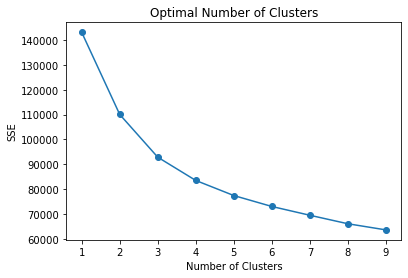

In [18]:
#Plotting cluster against SSE
plt.figure()
plt.plot(list(SSE.keys()), list(SSE.values()), marker='o')
plt.xlabel("Number of Clusters")
plt.ylabel("SSE")
plt.title("Optimal Number of Clusters")
plt.show()

#### Silhouette Score

- Silhouette Coefficient or silhouette score is a metric used to calculate the goodness of a clustering technique. Its value ranges from -1 to 1.

1: Means clusters are well apart from each other and clearly distinguished.

0: Means clusters are indifferent, or we can say that the distance between clusters is not significant.

-1: Means clusters are assigned in the wrong way.

Silhouette Score = (b-a)/max(a,b)

where,

a= average intra-cluster distance i.e the average distance between each point within a cluster.

b= average inter-cluster distance i.e the average distance between all clusters.

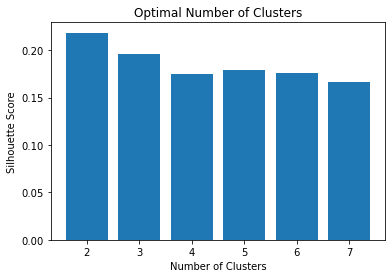

In [19]:
#Calculating and plotting silhouette scores for number of clusters ranging from 2-7
silhouette_scores = [] 

for n_cluster in range(2, 8):
    silhouette_scores.append( 
        silhouette_score(scaled_data, KMeans(n_clusters = n_cluster).fit_predict(scaled_data))) 
    
# Plotting a bar graph to compare the results 
k = range(2,8)
plt.bar(k, silhouette_scores) 
plt.xlabel('Number of Clusters') 
plt.ylabel('Silhouette Score')
plt.title("Optimal Number of Clusters")
plt.show()

- **The elbow chart appears to recommend somewhere between 2 to 5 potential clusters** 
- **The silhouette score for 2 clusters is the highest with the rest of the scores gradually decreasing**

In [20]:
#Clustering with number of clusters=2
kmeans = KMeans(n_clusters=2, max_iter=1000, random_state=23)
kmeans.fit_predict(scaled_data)

array([1, 1, 0, ..., 0, 1, 0])

#### Cluster Interpretation

In [21]:
#reverse scaling of data
data_2 = scaler.inverse_transform(scaled_data)

In [22]:
data_2 = pd.DataFrame(data_2, columns=col_names)
data_2.head()

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
0,40.900749,0.818182,95.40,0.00,95.4,5.684342e-14,0.166667,0.000000,0.083333,0.000000,0.0,2.0,1000.0,201.802084,139.509787,0.000000,12.0
1,3202.467416,0.909091,0.00,0.00,0.0,1.113869e+03,0.000000,0.000000,0.000000,0.250000,4.0,0.0,7000.0,4103.032597,1072.340217,0.222222,12.0
2,2495.148862,1.000000,773.17,773.17,0.0,5.684342e-14,1.000000,0.300000,0.000000,0.000000,0.0,12.0,7500.0,622.066742,627.284787,0.000000,12.0
3,1666.670542,0.888889,1499.00,577.83,0.0,2.057880e+02,0.083333,0.083333,0.000000,0.083333,1.0,1.0,7500.0,0.000000,312.452292,0.000000,12.0
4,817.714335,1.000000,16.00,16.00,0.0,5.684342e-14,0.083333,0.083333,0.000000,0.000000,0.0,1.0,1200.0,678.334763,244.791237,0.000000,12.0


In [24]:
#Adding the clusters to the dataframe
data_2['Cluster_Labels'] = kmeans.labels_
data_2['Segment'] = data_2['Cluster_Labels'].map({0:'First', 1:'Second'})

In [25]:
#Ordering the clusters
data_2['Segment'] = data_2['Segment'].astype('category')
data_2['Segment'] = data_2['Segment'].cat.reorder_categories(['First','Second'])

In [26]:
#Adding IDs back to the df
data_3 = pd.concat([cust_id,data_2], axis=1)
data_3.head()

,CUST_ID,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE,Cluster_Labels,Segment
0,C10001,40.900749,0.818182,95.40,0.00,95.4,5.684342e-14,0.166667,0.000000,0.083333,0.000000,0.0,2.0,1000.0,201.802084,139.509787,0.000000,12.0,1.0,Second
1,C10002,3202.467416,0.909091,0.00,0.00,0.0,1.113869e+03,0.000000,0.000000,0.000000,0.250000,4.0,0.0,7000.0,4103.032597,1072.340217,0.222222,12.0,1.0,Second
2,C10003,2495.148862,1.000000,773.17,773.17,0.0,5.684342e-14,1.000000,0.300000,0.000000,0.000000,0.0,12.0,7500.0,622.066742,627.284787,0.000000,12.0,0.0,First
3,C10004,1666.670542,0.888889,1499.00,577.83,0.0,2.057880e+02,0.083333,0.083333,0.000000,0.083333,1.0,1.0,7500.0,0.000000,312.452292,0.000000,12.0,1.0,Second
4,C10005,817.714335,1.000000,16.00,16.00,0.0,5.684342e-14,0.083333,0.083333,0.000000,0.000000,0.0,1.0,1200.0,678.334763,244.791237,0.000000,12.0,1.0,Second


In [27]:
#Cluster interpretation by using average 
clusters = data_3.groupby('Segment').agg(func='mean')
clusters

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE,Cluster_Labels
Segment,,,,,,,,,,,,,,,,,,
First,969.740237,0.964396,1021.46149,402.607261,415.514640,223.195498,0.834589,0.228107,0.653893,0.049185,0.853708,16.953483,4568.836012,1328.629704,414.178477,0.075454,12.0,0.0
Second,1360.779633,0.954453,167.72066,111.795212,41.486159,734.471067,0.149970,0.063736,0.078215,0.163193,2.823961,2.268504,3866.227579,956.760422,510.651264,0.028677,12.0,1.0


In [28]:
#Function to create profiles/segments using z-score 

def get_zprofiles(data):
    profile = data.groupby('Cluster_Labels').mean().subtract(data.drop('Cluster_Labels',axis=1).mean(),axis=1)
    profile = profile.divide(data.drop('Cluster_Labels',axis=1).std(),axis=1)
    profile['Size'] = data['Cluster_Labels'].value_counts()
    return profile

#Cluster interpretation by using z-score/std dev
get_zprofiles(data_3)

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE,Size
Cluster_Labels,,,,,,,,,,,,,,,,,,
0.0,-0.168089,0.074226,0.668989,0.415622,0.661208,-0.375290,0.857544,0.429228,0.728178,-0.414105,-0.391095,0.759558,0.117322,0.199075,-0.128067,0.292167,NaN,4450
1.0,0.166259,-0.073417,-0.661703,-0.411095,-0.654006,0.371202,-0.848205,-0.424553,-0.720247,0.409594,0.386836,-0.751285,-0.116045,-0.196906,0.126672,-0.288985,NaN,4499


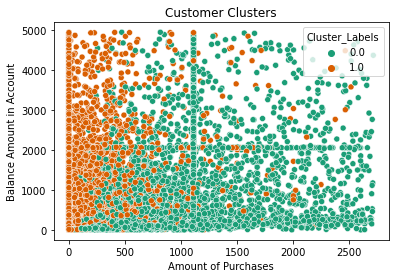

In [31]:
#Visualizing clusters
sns.scatterplot(x='PURCHASES', y='BALANCE', hue='Cluster_Labels', data=data_3, palette='Dark2')
plt.xlabel('Amount of Purchases')
plt.ylabel('Balance Amount in Account')
plt.title('Customer Clusters')
plt.show()

In [32]:
#Clustering with number of clusters=3
kmeans = KMeans(n_clusters=3, max_iter=1000, random_state=23)
kmeans.fit_predict(scaled_data)

array([2, 0, 1, ..., 2, 2, 1])

In [33]:
#reverse scaling of data
df = scaler.inverse_transform(scaled_data)

In [34]:
df = pd.DataFrame(df, columns=col_names)

In [35]:
#Adding the clusters to the dataframe
df['Cluster_Labels'] = kmeans.labels_
df['Segment'] = df['Cluster_Labels'].map({0:'First', 1:'Second', 2:'Third'})

In [36]:
#Ordering the clusters
df['Segment'] = df['Segment'].astype('category')
df['Segment'] = df['Segment'].cat.reorder_categories(['First','Second','Third'])

In [37]:
#Adding IDs back to the df
df_new = pd.concat([cust_id,df], axis=1)
df_new.head()

,CUST_ID,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE,Cluster_Labels,Segment
0,C10001,40.900749,0.818182,95.40,0.00,95.4,5.684342e-14,0.166667,0.000000,0.083333,0.000000,0.0,2.0,1000.0,201.802084,139.509787,0.000000,12.0,2.0,Third
1,C10002,3202.467416,0.909091,0.00,0.00,0.0,1.113869e+03,0.000000,0.000000,0.000000,0.250000,4.0,0.0,7000.0,4103.032597,1072.340217,0.222222,12.0,0.0,First
2,C10003,2495.148862,1.000000,773.17,773.17,0.0,5.684342e-14,1.000000,0.300000,0.000000,0.000000,0.0,12.0,7500.0,622.066742,627.284787,0.000000,12.0,1.0,Second
3,C10004,1666.670542,0.888889,1499.00,577.83,0.0,2.057880e+02,0.083333,0.083333,0.000000,0.083333,1.0,1.0,7500.0,0.000000,312.452292,0.000000,12.0,2.0,Third
4,C10005,817.714335,1.000000,16.00,16.00,0.0,5.684342e-14,0.083333,0.083333,0.000000,0.000000,0.0,1.0,1200.0,678.334763,244.791237,0.000000,12.0,2.0,Third


In [38]:
#Cluster interpretation by using average 
clusters_new = df_new.groupby('Segment').agg(func='mean')
clusters_new

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE,Cluster_Labels
Segment,,,,,,,,,,,,,,,,,,
First,1944.848062,0.969921,149.786214,90.488684,42.366919,1173.307053,0.133930,0.054748,0.072063,0.253805,4.498501,2.199025,4577.781564,1267.764830,674.834278,0.023514,12.0,0.0
Second,1387.036045,0.982123,1337.662139,569.482916,462.264801,320.148083,0.875151,0.319354,0.662065,0.069752,1.200295,20.511782,5523.119635,1752.581737,528.632691,0.064744,12.0,1.0
Third,415.553183,0.934209,355.500390,142.055978,187.136112,83.506280,0.464068,0.080894,0.356601,0.024258,0.348387,6.752314,2948.433097,581.895865,253.657790,0.063453,12.0,2.0


In [40]:
#Cluster interpretation by using z-score/std dev
get_zprofiles(df_new)

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE,Size
Cluster_Labels,,,,,,,,,,,,,,,,,,
0.0,0.665651,0.156260,-0.689656,-0.471665,-0.650909,1.011928,-0.888168,-0.471237,-0.735727,1.064261,1.048008,-0.758434,0.120294,0.134263,0.560203,-0.353123,NaN,2668
1.0,0.188709,0.337440,1.161838,0.890014,0.825597,-0.233733,0.958605,0.903191,0.748738,-0.265510,-0.254250,1.125649,0.434281,0.650515,0.174153,0.159100,NaN,2716
2.0,-0.641933,-0.374022,-0.369018,-0.325070,-0.141850,-0.579244,-0.065621,-0.335430,-0.019819,-0.594200,-0.590615,-0.289975,-0.420884,-0.596077,-0.551928,0.143063,NaN,3565


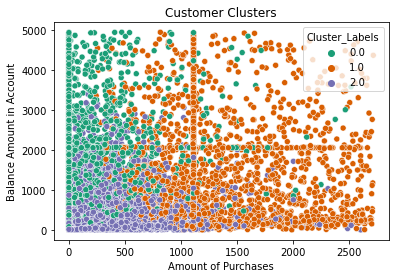

In [65]:
#Cluster visualization in terms of PURCHASES & BALANCE
sns.scatterplot(x='PURCHASES', y='BALANCE', hue='Cluster_Labels', data=df_new, palette='Dark2')
plt.xlabel('Amount of Purchases')
plt.ylabel('Balance Amount in Account')
plt.title('Customer Clusters')
plt.show()

#### Interpretation

- ***Cluster '0' -- Number of purchase transactions are less even with sufficient credit limit and account balances, along with low installment based purchases. Hence, the bank should offer them some promo-based cashback offers and discounts to further increase the usage of credit cards to encourage further installment based purchases or even oneoff-purchases. This specific cluster of customers prefer cash withdrawal over online purchase transactions. Such cash advances carry a high interest rate and involve immediate accrual of interest as banks view them as high risk, and therefore a keen eye should be kept on this cluster to avoid future defaults. In-depth analysis may yield information regarding their areas of interest while making purchases, which may then be targeted to extend suitable promotional offers and attractive allowances.***

- ***Cluster '1' -- The credit limit of second cluster is high and so are their purchase transactions, whether one-off(s) or installments. The bank may target this cluster for credit card up-gradation like Silver to Gold, or Platinum variants with higher credit limits. This group also can be offered premium concierge services on a chargeable basis. They may also be targeted for loan cross-sell as this will help to increase profitability and stickiness. Adequate measures must be taken to convert them to long-term customers.***

- ***Cluster '2' -- Purchase transactions and account balances tend to be lesser than their respective averages. Credit limit also appears to be on the low side in comparison to the other two clusters. Hence, adequate measures must be necessitated by the bank to extend more credit and thereby increase their spending to help generate revenue as well as raise the profit margin. Rewards such as cashback or bonus points may help cultivate increased purchases from this segment's side.*** 

- ***Additional probing into the customer demographics may help banks and/or financial institutions to sensitize the customers to start pension planning immediately, if not already initiated by the latter, and must offer related product solutions as well. The bank should offer insurance plans related to life, health, and general categories.***

### Classification

- Classification using logistic regression in terms of the cluster labels created

Evaluation metrics:

- **Accuracy score** - ratio of number of correct predictions to the total number of input samples

- **ROC-AUC** - ROC is a probability curve and AUC represents the degree or measure of separability; tells how much the model is capable of distinguishing between classes

- **Confusion matrix** - a kind of contingency table, with two dimensions ("actual" and "predicted"), and identical sets of "classes" in both dimensions (each combination of dimension and class is a variable in the contingency table)

- **Precision** - quantifies the number of positive class predictions that actually belong to the positive class

- **Recall** - quantifies the number of positive class predictions made out of all positive examples in the dataset

- **F1-score** - harmonic mean of precision and recall and a better measure than accuracy score


In [42]:
#Dropping the record with missing values for all features
df_new.dropna(axis=0, how='any', inplace=True)

In [43]:
#Separating the features and target variables
x = df_new.drop(['Cluster_Labels','Segment'],axis=1)
y = df_new['Cluster_Labels']

In [44]:
#Splitting into train & test sets 
x_train,x_test,y_train,y_test = train_test_split(x, y, test_size=0.2, random_state=36)

In [45]:
#Storing customer id as a separate variable
x_train_cust_id = x_train['CUST_ID']
x_test_cust_id = x_test['CUST_ID']

In [46]:
#Dropping customer id column
x_train.drop('CUST_ID', axis=1, inplace=True)
x_test.drop('CUST_ID', axis=1, inplace=True)

In [47]:
#Instantiating model and fitting the train variables
log_reg = LogisticRegression(max_iter=2000, multi_class='ovr')
log_reg.fit(x_train,y_train)

LogisticRegression(max_iter=2000, multi_class='ovr')

In [48]:
#Predicting target values for x_test
lrpredict = log_reg.predict(x_test)

In [49]:
lrpredict[1:5]

array([2., 2., 0., 2.])

In [50]:
#Confusion matrix
confusion_matrix(y_test,lrpredict)

array([[528,   8,  11],
       [  5, 505,  14],
       [ 19,  10, 690]], dtype=int64)

In [51]:
#Classification report
print(classification_report(y_test,lrpredict))

              precision    recall  f1-score   support

         0.0       0.96      0.97      0.96       547
         1.0       0.97      0.96      0.96       524
         2.0       0.97      0.96      0.96       719

    accuracy                           0.96      1790
   macro avg       0.96      0.96      0.96      1790
weighted avg       0.96      0.96      0.96      1790



In [52]:
#Accuracy score of model
accuracy_score(y_test,lrpredict)

0.9625698324022346

In [63]:
#ROC-AUC score
probs = log_reg.predict_proba(x_test) 
roc_auc_score(y_test,probs,multi_class='ovr')

0.9967780975785588

In [54]:
#Converting predictions from array to dataframe
pred = pd.DataFrame(lrpredict, columns=['Predicted Label'])
pred.reset_index(drop=True, inplace=True)

In [55]:
#Merging cust id of test set with respective predictions
x_test_cust_id.reset_index(drop=True, inplace=True)
pred_df = pd.concat([x_test_cust_id, pred], axis=1)
pred_df

,CUST_ID,Predicted Label
0,C10049,0.0
1,C18675,2.0
2,C16916,2.0
3,C14034,0.0
4,C16255,2.0
...,...,...
1785,C12154,1.0
1786,C17308,2.0
1787,C18439,2.0
1788,C10303,1.0


In [56]:
#Saving the classifier model as pickle file
filename = 'Cust_Seg_Classifier_Model.pkl'
pickle.dump(log_reg, open(filename, 'wb'))

#### Now, let's read in the model that was saved and use it to predict a new data entry:

In [57]:
#Loading saved model
with open('Cust_Seg_Classifier_Model.pkl', 'rb') as f:
    model = pickle.load(f)

In [58]:
## creating a new test record to predict the cluster segment
test_data = {
    'BALANCE':707,
    'BALANCE_FREQUENCY':1,
    'PURCHASES':5671.89,
    'ONEOFF_PURCHASES':2890,
    'INSTALLMENTS_PURCHASES':326.64,
    'CASH_ADVANCE':3456,
    'PURCHASES_FREQUENCY':1,
    'ONEOFF_PURCHASES_FREQUENCY':0.298,
    'PURCHASES_INSTALLMENTS_FREQUENCY':0.75,
    'CASH_ADVANCE_FREQUENCY':0.67,
    'CASH_ADVANCE_TRX':15,
    'PURCHASES_TRX':23.44,
    'CREDIT_LIMIT':6729.88,
    'PAYMENTS':12376.58,
    'MINIMUM_PAYMENTS':3892.50,
    'PRC_FULL_PAYMENT':0.84,
    'TENURE':9
}

In [59]:
test_df = pd.DataFrame([test_data], columns=test_data.keys())
test_df

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
0,707,1,5671.89,2890,326.64,3456,1,0.298,0.75,0.67,15,23.44,6729.88,12376.58,3892.5,0.84,9


In [60]:
print(model.predict(test_df))

[1.]


In [61]:
print(model.predict_proba(test_df))

[[4.99893087e-01 5.00106913e-01 1.74086806e-25]]


**This specific customer belongs to cluster 1/segment 2 with 50% probability**

In [62]:
##end of notebook